# **Preparation**

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

In [2]:
val_dir = "/content/drive/MyDrive/FruitNet-Dataset/Apple/valid"

In [3]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    class_names=['bad', 'good'],
    batch_size=1,
    image_size=(224, 224),
    shuffle=False
)

Found 237 files belonging to 2 classes.


In [4]:
val_datagen = ImageDataGenerator(rescale=1./255.)

In [5]:
validation_generator = val_datagen.flow_from_directory(val_dir,
                                                       batch_size=1,
                                                       class_mode='categorical',
                                                       target_size=(224, 224),
                                                       shuffle=False)

Found 237 images belonging to 2 classes.


In [6]:
xception_dir = '/content/drive/MyDrive/FruitNet-Dataset/apple_xception.zip'
mobilenet_dir = '/content/drive/MyDrive/FruitNet-Dataset/apple_mobilenetv2.zip'
densenet_dir = '/content/drive/MyDrive/FruitNet-Dataset/apple_densenet121.zip'

In [7]:
!unzip '/content/drive/MyDrive/FruitNet-Dataset/apple_xception.zip' -d '/content/xception'
!unzip '/content/drive/MyDrive/FruitNet-Dataset/apple_mobilenetv2.zip' -d '/content/mobilenetv2'
!unzip '/content/drive/MyDrive/FruitNet-Dataset/apple_densenet121.zip' -d '/content/densenet121'

Archive:  /content/drive/MyDrive/FruitNet-Dataset/apple_xception.zip
   creating: /content/xception/content/checkpoint/xception/
   creating: /content/xception/content/checkpoint/xception/variables/
  inflating: /content/xception/content/checkpoint/xception/variables/variables.data-00000-of-00001  
  inflating: /content/xception/content/checkpoint/xception/variables/variables.index  
   creating: /content/xception/content/checkpoint/xception/assets/
 extracting: /content/xception/content/checkpoint/xception/fingerprint.pb  
  inflating: /content/xception/content/checkpoint/xception/saved_model.pb  
  inflating: /content/xception/content/checkpoint/xception/keras_metadata.pb  
Archive:  /content/drive/MyDrive/FruitNet-Dataset/apple_mobilenetv2.zip
   creating: /content/mobilenetv2/content/checkpoint/mobilenetv2/
   creating: /content/mobilenetv2/content/checkpoint/mobilenetv2/variables/
  inflating: /content/mobilenetv2/content/checkpoint/mobilenetv2/variables/variables.data-00000-of-00

In [8]:
target_names = ['bad', 'good']

# **Model Evaluation (Xception)**

In [9]:
model_xception = tf.keras.saving.load_model(
    '/content/xception/content/checkpoint/xception', custom_objects=None, compile=True, safe_mode=True
    )

In [10]:
# evaluate model
print("==========================Evaluate Model====================")
scores_xception = model_xception.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_xception[1]*100))
print("Loss: %.6f%%" % (scores_xception[0]*100))

==========================Evaluate Model====================
237/237 [==============================] - 69s 284ms/step - loss: 0.0292 - accuracy: 0.9916
Accuracy: 99.156117%
Loss: 2.922729%


==========================Confusion Matrix====================
237/237 [==============================] - 65s 270ms/step


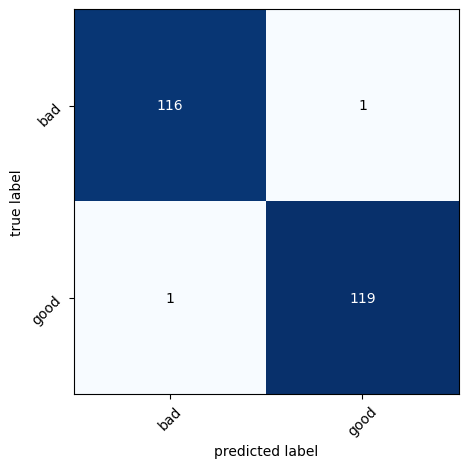

In [11]:
print("==========================Confusion Matrix====================")
y_pred = model_xception.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

In [12]:
print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

         bad       0.99      0.99      0.99       117
        good       0.99      0.99      0.99       120

    accuracy                           0.99       237
   macro avg       0.99      0.99      0.99       237
weighted avg       0.99      0.99      0.99       237



In [13]:
print("==========================F1 Score====================")
f1_xception = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_xception)

==========================F1 Score====================
F1 Score :  0.9915598290598291


# **Model Evaluation (MobileNetV2)**

In [14]:
model_mobilenetv2 = tf.keras.saving.load_model(
    '/content/mobilenetv2/content/checkpoint/mobilenetv2', custom_objects=None, compile=True, safe_mode=True
    )

In [15]:
# evaluate model
print("==========================Evaluate Model====================")
scores_mobilenetv2 = model_mobilenetv2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_mobilenetv2[1]*100))
print("Loss: %.6f%%" % (scores_mobilenetv2[0]*100))

==========================Evaluate Model====================
237/237 [==============================] - 15s 60ms/step - loss: 0.0181 - accuracy: 0.9958
Accuracy: 99.578059%
Loss: 1.811795%


==========================Confusion Matrix====================
237/237 [==============================] - 15s 59ms/step


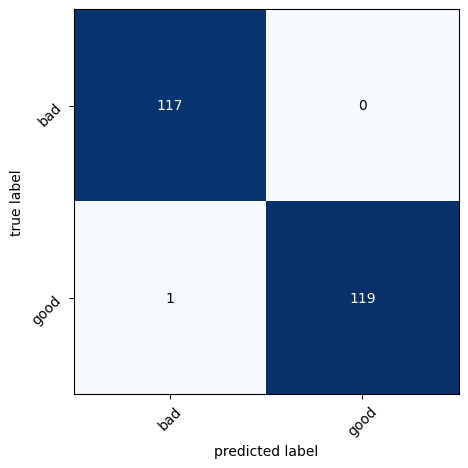

In [16]:
print("==========================Confusion Matrix====================")
y_pred = model_mobilenetv2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

In [17]:
print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

         bad       0.99      1.00      1.00       117
        good       1.00      0.99      1.00       120

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



In [18]:
print("==========================F1 Score====================")
f1_mobilenetv2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_mobilenetv2)

==========================F1 Score====================
F1 Score :  0.9957802902163269


# **Model Evaluation (DenseNet121)**

In [19]:
model_densenet121 = tf.keras.saving.load_model(
    '/content/densenet121/content/checkpoint/densenet121', custom_objects=None, compile=True, safe_mode=True
    )

In [20]:
# evaluate model
print("==========================Evaluate Model====================")
scores_densenet121 = model_densenet121.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_densenet121[1]*100))
print("Loss: %.6f%%" % (scores_densenet121[0]*100))

==========================Evaluate Model====================
237/237 [==============================] - 51s 206ms/step - loss: 0.0275 - accuracy: 0.9916
Accuracy: 99.156117%
Loss: 2.746072%


==========================Confusion Matrix====================
237/237 [==============================] - 51s 208ms/step


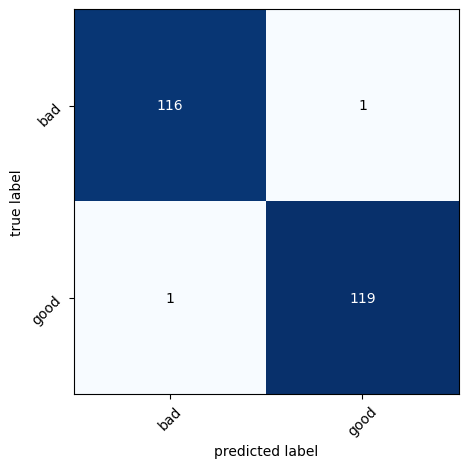

In [21]:
print("==========================Confusion Matrix====================")
y_pred = model_densenet121.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

In [22]:
print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

         bad       0.99      0.99      0.99       117
        good       0.99      0.99      0.99       120

    accuracy                           0.99       237
   macro avg       0.99      0.99      0.99       237
weighted avg       0.99      0.99      0.99       237



In [23]:
print("==========================F1 Score====================")
f1_densenet121 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_densenet121)

==========================F1 Score====================
F1 Score :  0.9915598290598291
